In [15]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [16]:
re_col_name = re.compile("(:?\')(.+)(\.)")

In [17]:
def read_itx(path):
    df = pd.DataFrame()
    df_list = []
    col_name_list = []
    col_name = ''
    re_col_name = re.compile("(:?\')(.+)(\.)")
    
    with open(path, 'r') as file:
        while True:
            df_length = 0
            df_length_prev = 0
            buffer = file.readline()
            if not buffer: 
                break
            if buffer.split('/')[0] == 'WAVES':
                df_list = []
                col_name = re_col_name.search(buffer).group(2).split('.')[0]
    #            col_name_list.append(col_name)
                buffer = file.readline()
                buffer = file.readline()
                while buffer != 'END':
                    df_list.append(float(buffer))
                    buffer = file.readline().strip()

                df[col_name] = df_list
    return df

In [18]:
data_list1 = []
foldername = 'S1506C.20180626/4_SweepH_SweepBg_forward'

for ind in [0, 70]:
    basename = 'S1506C.'
    filename = basename + '{:06d}'.format(ind) + '.itx' 
    path = foldername + '/' + filename
    data_list1.append(read_itx(path))

In [8]:
# data_list2 = []
# foldername = 'S1506C.20180628/4_SweepH_SweepBg_forward'

# for ind in [0, 70, 140]:
#     basename = 'S1506C.'
#     filename = basename + '{:06d}'.format(ind) + '.itx' 
#     path = foldername + '/' + filename
#     data_list2.append(read_itx(path))

In [20]:
data_list3 = []
foldername = 'S1506C.20180626/4_SweepH_SweepBg_backward'

for ind in [0, 70]:
    basename = 'S1506C.'
    filename = basename + '{:06d}'.format(ind) + '.itx' 
    path = foldername + '/' + filename
    data_list3.append(read_itx(path))

In [22]:
data_list3[1]

,Time,Temperature,Field,Position,VSource,Vsg,Vbg,Rxx2t X,R1X,R2X,...,R4Y,V1Y,V2Y,V3Y,V4Y,CurrentX,CurrentY,Rxx2t Y,Idc-Drain,Idc-Source
0,3.612923e+09,1.9990,-0.007078,90.002,0.01,0.0,10.0,115418.926357,1205.196478,1216.176142,...,49.428162,-1.061438e-06,-2.026043e-06,4.319613e-06,3.355008e-06,8.633023e-08,-5.178833e-09,6923.823707,-3.579217e-19,9.548790e-19
1,3.612923e+09,2.0002,-0.007078,90.002,0.01,0.0,9.9,115454.147933,1207.893915,1220.055050,...,48.218443,-1.241570e-06,-2.100310e-06,4.108119e-06,3.249379e-06,8.630358e-08,-5.179858e-09,6929.447154,-1.241487e-18,2.502226e-19
2,3.612923e+09,1.9992,-0.007078,90.002,0.01,0.0,9.8,115622.305222,1211.813163,1227.174681,...,49.064368,-1.561156e-06,-2.274086e-06,4.024641e-06,3.311711e-06,8.617719e-08,-5.179594e-09,6949.362790,-1.720245e-18,8.216228e-19
3,3.612923e+09,1.9990,-0.007078,90.002,0.01,0.0,9.7,116246.027911,1229.501446,1253.874199,...,49.937041,-1.804961e-06,-2.322512e-06,3.847568e-06,3.330017e-06,8.571280e-08,-5.168348e-09,7009.453986,-1.859088e-18,7.445110e-19
4,3.612923e+09,2.0001,-0.007078,90.002,0.01,0.0,9.6,116692.967226,1246.666854,1275.635739,...,50.711714,-1.871994e-06,-2.425010e-06,3.913757e-06,3.360740e-06,8.538406e-08,-5.152301e-09,7041.563754,-2.348416e-18,1.462048e-18
5,3.612923e+09,2.0006,-0.007078,90.002,0.01,0.0,9.5,117321.220709,1254.804838,1289.754444,...,52.075884,-1.533118e-06,-2.057949e-06,3.976958e-06,3.452128e-06,8.492581e-08,-5.133177e-09,7091.255142,-2.772382e-18,1.228412e-18
6,3.612923e+09,1.9989,-0.007078,90.002,0.01,0.0,9.4,117793.641767,1268.068886,1306.616753,...,51.742270,-1.357068e-06,-2.273814e-06,4.318054e-06,3.401308e-06,8.458502e-08,-5.114090e-09,7121.913722,-2.524323e-18,1.435239e-18
7,3.612923e+09,2.0001,-0.007078,90.002,0.01,0.0,9.3,118578.320419,1287.017792,1327.975704,...,53.184215,-1.057537e-06,-2.290818e-06,4.725692e-06,3.492412e-06,8.402279e-08,-5.100781e-09,7198.547707,-2.600741e-18,1.704413e-18
8,3.612923e+09,1.9999,-0.007078,90.002,0.01,0.0,9.2,119325.677582,1307.825147,1351.964975,...,58.467568,-1.022881e-06,-2.135005e-06,5.046998e-06,3.934873e-06,8.349615e-08,-5.072069e-09,7248.574630,-2.330497e-18,1.189673e-18
9,3.612923e+09,1.9987,-0.007078,90.002,0.01,0.0,9.1,119936.435704,1325.135770,1365.470540,...,60.984875,-1.147990e-06,-1.934793e-06,4.931426e-06,4.144622e-06,8.306963e-08,-5.057148e-09,7301.541565,-2.379915e-18,1.823071e-18


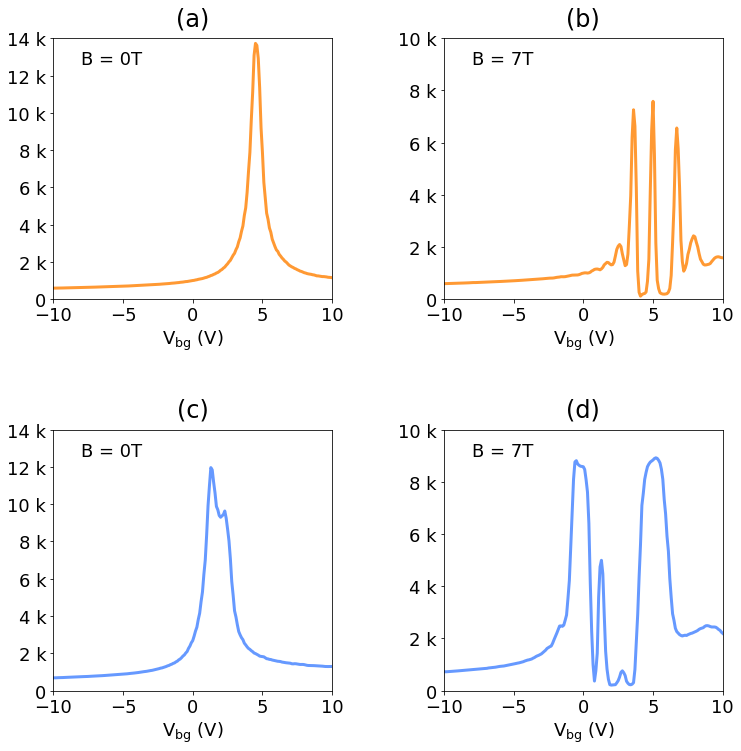

In [10]:
cbformatter = matplotlib.ticker.EngFormatter(unit='$\Omega$') # change color bar scale to SI units
axformatter = matplotlib.ticker.EngFormatter() # change axes scale to SI units

fig, ax = plt.subplots(figsize=(12, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels

ax1 = plt.subplot(2,2,1)
plt.plot(data_list1[1]['Vbg'], data_list1[1]['R1X'], color='#FF9933', linewidth=3, antialiased=True) 

plt.xlim((-10, 10))
#plt.xticks([-8, -4, 0, 4, 8])

plt.xlabel('V$_{\mathrm{bg}}$ (V)')
plt.ylim((0, 14000))
#plt.yticks()

plt.text(0.5, 1.05, 
     '(a)', 
     horizontalalignment='center',
     fontsize=24,
     transform=ax1.transAxes)

plt.text(0.1, 0.9, 
     'B = 0T', 
     horizontalalignment='left',
     fontsize=MEDIUM_SIZE,
     transform=ax1.transAxes)
ax1.yaxis.set_major_formatter(axformatter)

ax2 = plt.subplot(2,2,2)
plt.plot(data_list1[0]['Vbg'], data_list1[0]['R1X'], color='#FF9933', linewidth=3, antialiased=True) 

plt.xlim((-10, 10))
#plt.xticks([-8, -4, 0, 4, 8])

plt.xlabel('V$_{\mathrm{bg}}$ (V)')
plt.ylim((0, 10000))
#plt.yticks()

plt.text(0.5, 1.05, 
     '(b)', 
     horizontalalignment='center',
     fontsize=24,
     transform=ax2.transAxes)

plt.text(0.1, 0.9, 
     'B = 7T', 
     horizontalalignment='left',
     fontsize=MEDIUM_SIZE,
     transform=ax2.transAxes)
ax2.yaxis.set_major_formatter(axformatter)

ax3 = plt.subplot(2,2,3)
plt.plot(data_list2[1]['Vbg'], data_list2[1]['R1X'], color='#6699FF', linewidth=3, antialiased=True) 

plt.xlim((-10, 10))
#plt.xticks([-8, -4, 0, 4, 8])

plt.xlabel('V$_{\mathrm{bg}}$ (V)')
plt.ylim((0, 14000))
#plt.yticks()

plt.text(0.5, 1.05, 
     '(c)', 
     horizontalalignment='center',
     fontsize=24,
     transform=ax3.transAxes)

plt.text(0.1, 0.9, 
     'B = 0T', 
     horizontalalignment='left',
     fontsize=MEDIUM_SIZE,
     transform=ax3.transAxes)
ax3.yaxis.set_major_formatter(axformatter)

ax4 = plt.subplot(2,2,4)
plt.plot(data_list2[0]['Vbg'], data_list2[0]['R1X'], color='#6699FF', linewidth=3, antialiased=True) 

plt.xlim((-10, 10))
#plt.xticks([-8, -4, 0, 4, 8])

plt.xlabel('V$_{\mathrm{bg}}$ (V)')
plt.ylim((0, 10000))
#plt.yticks()

plt.text(0.5, 1.05, 
     '(d)', 
     horizontalalignment='center',
     fontsize=24,
     transform=ax4.transAxes)

plt.text(0.1, 0.9, 
     'B = 7T', 
     horizontalalignment='left',
     fontsize=MEDIUM_SIZE,
     transform=ax4.transAxes)
ax4.yaxis.set_major_formatter(axformatter)



In [55]:
# from matplotlib.backends.backend_pdf import PdfPages 
# pdf = PdfPages('FigureS5.pdf')
# pdf.savefig(fig)
# pdf.close()

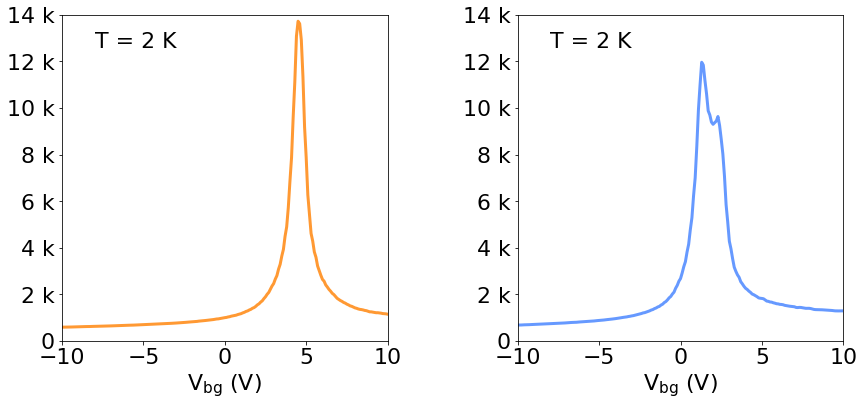

In [23]:
cbformatter = matplotlib.ticker.EngFormatter(unit='$\Omega$') # change color bar scale to SI units
axformatter = matplotlib.ticker.EngFormatter() # change axes scale to SI units

fig, ax = plt.subplots(figsize=(14, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels

ax1 = plt.subplot(1,2,1)
plt.plot(data_list1[1]['Vbg'], data_list1[1]['R1X'], color='#FF9933', linewidth=3, antialiased=True) 

plt.xlim((-10, 10))
#plt.xticks([-8, -4, 0, 4, 8])

plt.xlabel('V$_{\mathrm{bg}}$ (V)')
plt.ylim((0, 14000))
#plt.yticks()

# plt.text(0.5, 1.05, 
#      '(a)', 
#      horizontalalignment='center',
#      fontsize=24,
#      transform=ax1.transAxes)

plt.text(0.1, 0.9, 
     'T = 2 K', 
     horizontalalignment='left',
     fontsize=MEDIUM_SIZE,
     transform=ax1.transAxes)
ax1.yaxis.set_major_formatter(axformatter)

ax2 = plt.subplot(1,2,2)
plt.plot(data_list2[1]['Vbg'], data_list2[1]['R1X'], color='#6699FF', linewidth=3, antialiased=True) 

plt.xlim((-10, 10))
#plt.xticks([-8, -4, 0, 4, 8])

plt.xlabel('V$_{\mathrm{bg}}$ (V)')
plt.ylim((0, 14000))
#plt.yticks()

# plt.text(0.5, 1.05, 
#      '(c)', 
#      horizontalalignment='center',
#      fontsize=24,
#      transform=ax2.transAxes)

plt.text(0.1, 0.9, 
     'T = 2 K', 
     horizontalalignment='left',
     fontsize=MEDIUM_SIZE,
     transform=ax2.transAxes)
ax2.yaxis.set_major_formatter(axformatter)

plt.show()

In [24]:
from matplotlib.backends.backend_pdf import PdfPages 
pdf = PdfPages('DiracPointSplit.pdf')
pdf.savefig(fig)
pdf.close()

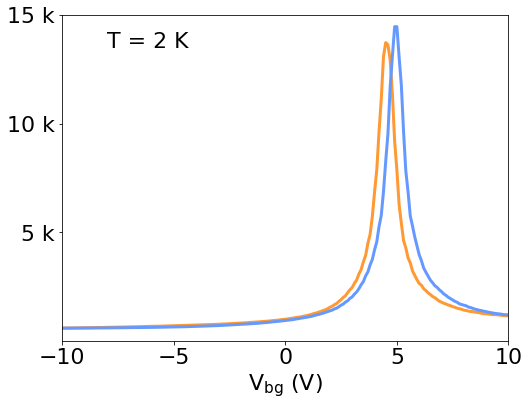

In [28]:
cbformatter = matplotlib.ticker.EngFormatter(unit='$\Omega$') # change color bar scale to SI units
axformatter = matplotlib.ticker.EngFormatter() # change axes scale to SI units

fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels

ax1 = plt.subplot(1,1,1)
plt.plot(data_list1[1]['Vbg'], data_list1[1]['R1X'], color='#FF9933', linewidth=3, antialiased=True) 
plt.plot(data_list3[1]['Vbg'], data_list3[1]['R1X'], color='#6699FF', linewidth=3, antialiased=True) 

plt.xlim((-10, 10))
#plt.xticks([-8, -4, 0, 4, 8])

plt.xlabel('V$_{\mathrm{bg}}$ (V)')
plt.yticks([5000, 10000, 15000])
plt.ylim((0, 15000))
#plt.yticks()

# plt.text(0.5, 1.05, 
#      '(a)', 
#      horizontalalignment='center',
#      fontsize=24,
#      transform=ax1.transAxes)

plt.text(0.1, 0.9, 
     'T = 2 K', 
     horizontalalignment='left',
     fontsize=MEDIUM_SIZE,
     transform=ax1.transAxes)
ax1.yaxis.set_major_formatter(axformatter)

# ax2 = plt.subplot(1,2,2)
# plt.plot(data_list3[1]['Vbg'], data_list3[1]['R1X'], color='#6699FF', linewidth=3, antialiased=True) 

# plt.xlim((-10, 10))
# #plt.xticks([-8, -4, 0, 4, 8])

# plt.xlabel('V$_{\mathrm{bg}}$ (V)')
# plt.ylim((0, 14000))
# #plt.yticks()

# # plt.text(0.5, 1.05, 
# #      '(c)', 
# #      horizontalalignment='center',
# #      fontsize=24,
# #      transform=ax2.transAxes)

# plt.text(0.1, 0.9, 
#      'T = 2 K', 
#      horizontalalignment='left',
#      fontsize=MEDIUM_SIZE,
#      transform=ax2.transAxes)
# ax2.yaxis.set_major_formatter(axformatter)

plt.show()

In [29]:
from matplotlib.backends.backend_pdf import PdfPages 
pdf = PdfPages('DiracPeak.pdf')
pdf.savefig(fig)
pdf.close()